In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
fifa21 = pd.read_csv('FIFA21_official_data.csv')

In [3]:
fifa21.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

In [4]:
relavent_fields = ['ID', 'Name', 'Overall', 'Club', 'Jersey Number',
                   'Finishing', 'ShortPassing', 'LongPassing',
                   'Best Position', 'Best Overall Rating']

In [5]:
players = fifa21[relavent_fields]

In [6]:
players = players[players['Overall'] >= 60]

In [7]:
barcelona_players = players[players['Club'] == 'FC Barcelona']
city_players = players[players['Club'] == 'Manchester City']

## Barcelona starters

In [8]:
barcelona_players = barcelona_players.sort_values('Jersey Number')

In [9]:
barcelona_starters_id = [192448, 152729, 189511, 194765, 180206, 158023, 231443, 220440, 189332, 199564, 228702]

In [10]:
barcelona_starters = barcelona_players[barcelona_players['ID'].isin(barcelona_starters_id)]
barcelona_starters.to_csv('barcelona_starters.csv')

In [11]:
barcelona_starters

,ID,Name,Overall,Club,Jersey Number,Finishing,ShortPassing,LongPassing,Best Position,Best Overall Rating
13611,192448,M. ter Stegen,90,FC Barcelona,1.0,14.0,61.0,63.0,GK,90.0
962,152729,Piqué,86,FC Barcelona,3.0,65.0,81.0,81.0,CB,86.0
692,189511,Sergio Busquets,87,FC Barcelona,5.0,67.0,89.0,83.0,CDM,87.0
3,194765,A. Griezmann,87,FC Barcelona,7.0,88.0,84.0,82.0,ST,87.0
59,180206,M. Pjanić,85,FC Barcelona,8.0,56.0,90.0,87.0,CM,85.0
18,158023,L. Messi,93,FC Barcelona,10.0,95.0,91.0,91.0,RW,93.0
978,231443,O. Dembélé,83,FC Barcelona,11.0,75.0,78.0,76.0,LM,85.0
1781,220440,C. Lenglet,85,FC Barcelona,15.0,39.0,78.0,74.0,CB,86.0
21,189332,Jordi Alba,86,FC Barcelona,18.0,73.0,84.0,79.0,LB,86.0
254,199564,Sergi Roberto,83,FC Barcelona,20.0,63.0,84.0,78.0,RB,83.0


## City starters

In [12]:
city_players = city_players.sort_values('Jersey Number')

In [13]:
city_starters_id = [188377, 202652, 153079, 212218, 192985, 218667, 135507, 210257, 204884, 203574, 231866]
city_starters = city_players[city_players['ID'].isin(city_starters_id)]
city_starters.to_csv('city_starters.csv')

In [14]:
# city_starters

## Simulating gameplay

In [15]:
random.seed(34)

### --- Scoring likelihood is proportional to 'finishing'

In [16]:
barcelona_starters['scoring likelihood'] = barcelona_starters.apply(lambda row: row.Finishing, axis=1)

In [17]:
barcelona_starters

,ID,Name,Overall,Club,Jersey Number,Finishing,ShortPassing,LongPassing,Best Position,Best Overall Rating,scoring likelihood
13611,192448,M. ter Stegen,90,FC Barcelona,1.0,14.0,61.0,63.0,GK,90.0,14.0
962,152729,Piqué,86,FC Barcelona,3.0,65.0,81.0,81.0,CB,86.0,65.0
692,189511,Sergio Busquets,87,FC Barcelona,5.0,67.0,89.0,83.0,CDM,87.0,67.0
3,194765,A. Griezmann,87,FC Barcelona,7.0,88.0,84.0,82.0,ST,87.0,88.0
59,180206,M. Pjanić,85,FC Barcelona,8.0,56.0,90.0,87.0,CM,85.0,56.0
18,158023,L. Messi,93,FC Barcelona,10.0,95.0,91.0,91.0,RW,93.0,95.0
978,231443,O. Dembélé,83,FC Barcelona,11.0,75.0,78.0,76.0,LM,85.0,75.0
1781,220440,C. Lenglet,85,FC Barcelona,15.0,39.0,78.0,74.0,CB,86.0,39.0
21,189332,Jordi Alba,86,FC Barcelona,18.0,73.0,84.0,79.0,LB,86.0,73.0
254,199564,Sergi Roberto,83,FC Barcelona,20.0,63.0,84.0,78.0,RB,83.0,63.0


In [18]:
#likelihood of each barcelona player scoring

gk = [1]
defense = [3,15,18,20]
mid = [5,8,21]
forwards = [7,10,11]
weights = list(barcelona_starters['Finishing'])

### plays more forward => more likely to score

In [19]:
def adjust_likelihood(jersey_num, initial_likelihood):
    if jersey_num in gk:
        return initial_likelihood/100
    if jersey_num in defense:
        return initial_likelihood
    if jersey_num in mid:
        return initial_likelihood * 2
    if jersey_num in forwards:
        return initial_likelihood * 4

In [20]:
barcelona_starters['scoring likelihood'] = barcelona_starters.apply(lambda row: adjust_likelihood(row['Jersey Number'], row['scoring likelihood']), axis = 1)

In [21]:
barcelona_starters

,ID,Name,Overall,Club,Jersey Number,Finishing,ShortPassing,LongPassing,Best Position,Best Overall Rating,scoring likelihood
13611,192448,M. ter Stegen,90,FC Barcelona,1.0,14.0,61.0,63.0,GK,90.0,0.14
962,152729,Piqué,86,FC Barcelona,3.0,65.0,81.0,81.0,CB,86.0,65.00
692,189511,Sergio Busquets,87,FC Barcelona,5.0,67.0,89.0,83.0,CDM,87.0,134.00
3,194765,A. Griezmann,87,FC Barcelona,7.0,88.0,84.0,82.0,ST,87.0,352.00
59,180206,M. Pjanić,85,FC Barcelona,8.0,56.0,90.0,87.0,CM,85.0,112.00
18,158023,L. Messi,93,FC Barcelona,10.0,95.0,91.0,91.0,RW,93.0,380.00
978,231443,O. Dembélé,83,FC Barcelona,11.0,75.0,78.0,76.0,LM,85.0,300.00
1781,220440,C. Lenglet,85,FC Barcelona,15.0,39.0,78.0,74.0,CB,86.0,39.00
21,189332,Jordi Alba,86,FC Barcelona,18.0,73.0,84.0,79.0,LB,86.0,73.00
254,199564,Sergi Roberto,83,FC Barcelona,20.0,63.0,84.0,78.0,RB,83.0,63.00


In [22]:
#likelihood of each city player scoring

city_starters['scoring likelihood'] = city_starters.apply(lambda row: row.Finishing, axis=1)

gk = [31]
defense = [2, 5, 14, 22]
mid = [17, 25, 16]
forwards = [7, 10, 20]

weights = list(city_starters['Finishing'])

city_starters['scoring likelihood'] = city_starters.apply(
                                                    lambda row: adjust_likelihood(row['Jersey Number'], row['scoring likelihood']), 
                                                    axis = 1)

In [23]:
# barcelona_starters
# city_starters

In [24]:
# population = list(city_starters['Name'])
# weights = list(city_starters['scoring likelihood'])
# goals = dict()
# for i in range(5000):
#     curr_choice = random.choices([x for x in range(0,11)], weights)[0]
#     if population[curr_choice] in goals.keys():
#         goals[population[curr_choice]]+=1
#     else:
#         goals[population[curr_choice]] = 1
# goals

In [25]:
# assigning numnber of passes 
# barca_total_passes = 650 + (random.random() - 0.5)*2*100
# city_total_passes = 650 + (random.random() - 0.5)*2*100

# barca_starters_numbers = [int(x) for x in list(barcelona_starters['Jersey Number'])]
# city_starters_numbers = [int(x) for x in list(city_starters['Jersey Number'])]


# barca_passes_byPlayers = {(p1,p2): 0 for p1 in barca_starters_numbers for p2 in barca_starters_numbers if p1 != p2}
# city_passes_byPlayers = {(p1,p2): 0 for p1 in city_starters_numbers for p2 in city_starters_numbers if p1 != p2}

# for i in range(90):
#     #for this minute
#     barca_passes = 7 + (random.random() - 0.5)*2*5
#     city_passes = 7 + (random.random() - 0.5)*2*5
    
#     #for barca
#     for k in range(int(barca_passes)):
#         barca_passes_byPlayers[random.choice(list(barca_passes_byPlayers.keys()))] += 1
    
#     #for city
#     for k in range(int(city_passes)):
#         city_passes_byPlayers[random.choice(list(city_passes_byPlayers.keys()))] += 1

# city_passes_byPlayers

## scoring chances weighted by 'scorer_weights'

In [52]:
def game():
    population = [0,1]
    weights = [29/30, 1/30]
    
    team1_score = 0
    team2_score = 0
    team1_scorers = []
    team1_score_time = []
    team2_scorers = []
    team2_score_time = []

    for i in range(90):
        team_1 = random.choices(population, weights)[0]
        team_2 = random.choices(population, weights)[0]
        
        if team_1 == 1:   #team1 scores
            scorer_population = list(barcelona_starters['Name'])
            scorer_weights = list(barcelona_starters['scoring likelihood'])
            #generates a number, according to weight
            curr_choice = random.choices([x for x in range(0,11)], scorer_weights)[0]
            #a player is chosen based on the generated number
            curr_scorer = scorer_population[curr_choice]
            team1_scorers.append(curr_scorer)
            team1_score_time.append(i)
#             print("Goal Barcelona {}' - {}".format(i, curr_scorer))
            team1_score+=1
            
        if team_2 == 1:    #team2 scores
            scorer_population = list(city_starters['Name'])
            scorer_weights = list(city_starters['scoring likelihood'])
            curr_choice = random.choices([x for x in range(0,11)], scorer_weights)[0]
            curr_scorer = scorer_population[curr_choice]
            team2_scorers.append(curr_scorer)
            team1_score_time.append(i)
#             print("Goal Manchester City {}' - {}' ".format(i, curr_scorer))
            team2_score+=1

        
#     print('Final Score: {} - {}'.format(team1_score, team2_score))
    return [(team1_score, team2_score), team1_score_time, team2_score_time, team1_scorers, team2_scorers]

In [53]:
g = game()

In [54]:
# more than one game at a time
def play_game(n):
    team_1_total_score = 0
    team_2_total_score = 0
    team_1_all_scorers = []
    team_2_all_scorers = []
    
    for i in range(n):
        (team1_score, team2_score), team1_score_time, team2_score_time, team1_scorers, team2_scorers = game()
        team_1_total_score += team1_score
        team_2_total_score += team2_score
        
        team_1_all_scorers += team1_scorers
        team_2_all_scorers += team2_scorers
    all_team1_scorers = dict(Counter(team_1_all_scorers))
    all_team2_scorers = dict(Counter(team_2_all_scorers))
    
    all_team1_scorers = {k: v for k, v in sorted(all_team1_scorers.items(), key=lambda item: item[1], reverse=True)}
    all_team2_scorers = {k: v for k, v in sorted(all_team2_scorers.items(), key=lambda item: item[1], reverse=True)}


    return [team_1_total_score, team_2_total_score, all_team1_scorers, all_team2_scorers]

In [55]:
team_1_total_score, team_2_total_score, all_team1_scorers, all_team2_scorers = play_game(2000)

# print('Final score: ----Barcelona {} - {} Manchester City----'.format(team_1_total_score, team_2_total_score))
# print('='*30)
# print('Barcelona scorers: ')
# print ("{:<10}            {:<20}".format('Player', 'Number of goals')) 
# for key, value in all_team1_scorers.items(): 
#     print ("{:<10}            {:<20}".format(key, value)) 
# print('='*30)
# print('Man City scorers: ')
# print ("{:<10}            {:<20}".format('Player', 'Number of goals')) 
# for key, value in all_team2_scorers.items(): 
#     print ("{:<10}            {:<20}".format(key, value))

In [56]:
barca_scorer_names = list(reversed([t[0] for t in list(all_team1_scorers.items())]))
barca_scorer_goals = list(reversed([t[1] for t in list(all_team1_scorers.items())]))

city_scorer_names = list(reversed([t[0] for t in list(all_team2_scorers.items())]))
city_scorer_goals = list(reversed([t[1] for t in list(all_team2_scorers.items())]))

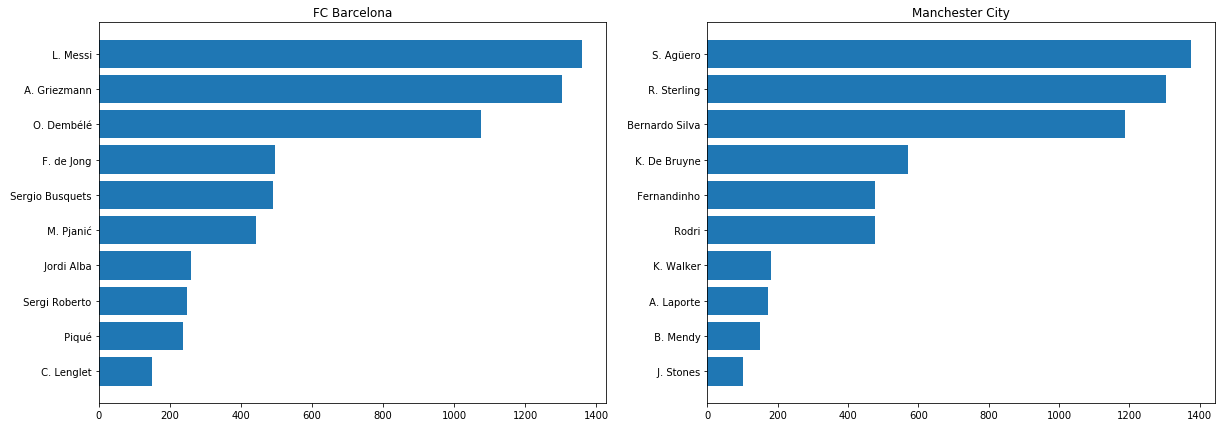

In [57]:
fig, ax = plt.subplots(1,2, figsize = (20,7))
ax[0].barh(barca_scorer_names, barca_scorer_goals)
ax[0].tick_params(labelrotation=0)
ax[0].title.set_text('FC Barcelona')


ax[1].barh(city_scorer_names, city_scorer_goals)
ax[1].tick_params(labelrotation=0)
ax[1].title.set_text('Manchester City')